This notbook is for capstone project

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
print('imported')

imported


In [2]:
file_name='https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
df=pd.read_csv(file_name)
df.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df.columns.values 

array(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY',
       'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION',
       'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING',
       'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR'], dtype=object)

In [4]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [5]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [6]:
df.shape

(194673, 38)

In [8]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts()) 
    print("")  
#"True" stands for missing value, while "False" stands for not missing value.

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: C

In [9]:
df.drop(["SPEEDING","PEDROWNOTGRNT","INATTENTIONIND","EXCEPTRSNDESC","INTKEY",'EXCEPTRSNCODE','SEVERITYCODE.1'], axis=1, inplace=True)

In [10]:
df.shape

(194673, 31)

In [ ]:
#What feature do we have?

In [11]:
for feature in ['ADDRTYPE','SEVERITYCODE','SEVERITYDESC','COLLISIONTYPE','JUNCTIONTYPE']:
    print(df[feature].unique())

['Intersection' 'Block' 'Alley' nan]
[2 1]
['Injury Collision' 'Property Damage Only Collision']
['Angles' 'Sideswipe' 'Parked Car' 'Other' 'Cycles' 'Rear Ended' 'Head On'
 nan 'Left Turn' 'Pedestrian' 'Right Turn']
['At Intersection (intersection related)'
 'Mid-Block (not related to intersection)' 'Driveway Junction'
 'Mid-Block (but intersection related)'
 'At Intersection (but not related to intersection)' nan 'Unknown'
 'Ramp Junction']


In [57]:
df['SEVERITYCODE'].value_counts().to_frame()
#df['SEVERITYDESC'].value_counts().to_frame()

,SEVERITYCODE
1,136485
2,58188


Text(0, 0.5, 'count')

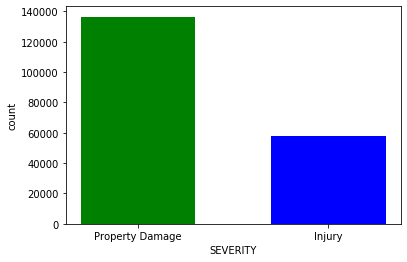

In [45]:
group_names = ['Property Damage', 'Injury']
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["SEVERITYCODE"].value_counts(),width=0.6, color = 'gb')

# set x/y labels and plot title
plt.pyplot.xlabel('SEVERITY')
plt.pyplot.ylabel("count")



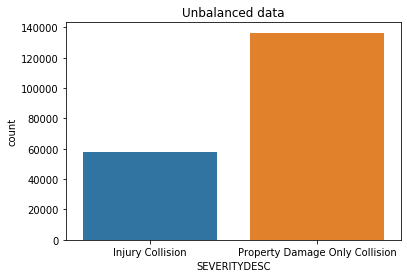

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt 


sns.countplot('SEVERITYDESC', data=df)
plt.title('Unbalanced data')


plt.savefig('severity1.png', bbox_inches='tight')
plt.show()

In [76]:
from sklearn.utils import resample
df_max=df[df.SEVERITYCODE== 1]
df_min=df[df.SEVERITYCODE== 2]
df_max_resample= resample(df_max,replace=False, n_samples=58188)

df_b = pd.concat([df_min ,df_max_resample ])
df_b['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
2,58188
1,58188


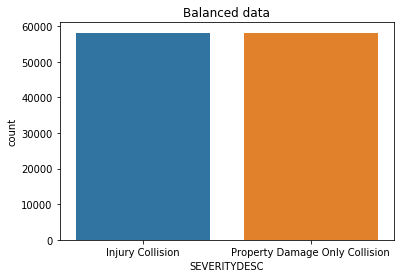

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt 


sns.countplot('SEVERITYDESC', data=df_b)

plt.title('Balanced data')
plt.savefig('severity2.png', bbox_inches='tight')
plt.show()

In [12]:
df['ADDRTYPE'].value_counts().to_frame()

,ADDRTYPE
Block,126926
Intersection,65070
Alley,751


In [ ]:
#Convert categorical variable into dummy/indicator variables
#df['ADDRTYPE'].replace(to_replace=['Block','Intersection','Alley'], value=[0,1,2],inplace=True)
#df['ADDRTYPE'].value_counts().to_frame()

In [ ]:
#import seaborn as sns
#sns.boxplot(x="ADDRTYPE", y="PERSONCOUNT" , data=df)

In [20]:
#import pylab as pl
#import matplotlib.pyplot as plt
#viz = df[['ADDRTYPE','SEVERITYCODE']]
#viz.hist()
#plt.show()

In [15]:
dummy_variable_1 = pd.get_dummies(df['SEVERITYDESC'])
dummy_variable_1.rename(columns={'Injury Collision':'Injury-Collision', 'Property Damage Only Collision':'Property-Damage'}, inplace=True)
dummy_variable_1.head()

,Injury-Collision,Property-Damage
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


In [17]:
# merge data frame "df" and "dummy_variable_1" 
df_test = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df_test.drop(['SEVERITYDESC','SEVERITYCODE'], axis = 1, inplace=True)

In [18]:
df2 = df_test[['ADDRTYPE','PERSONCOUNT','PEDCOUNT',
       'VEHCOUNT']]
df_collision2= df2.groupby('ADDRTYPE', axis=0).sum().astype(int)
print(df_collision2)

              PERSONCOUNT  Injury-Collision  Property-Damage
ADDRTYPE                                                    
Alley                1426                82              669
Block              303169             30096            96830
Intersection       167359             27819            37251


In [21]:
df['COLLISIONTYPE'].value_counts().to_frame()

,COLLISIONTYPE
Parked Car,47987
Angles,34674
Rear Ended,34090
Other,23703
Sideswipe,18609
Left Turn,13703
Pedestrian,6608
Cycles,5415
Right Turn,2956
Head On,2024


In [22]:
df1 = df_test[['COLLISIONTYPE','PERSONCOUNT','Injury-Collision','Property-Damage']]
df_collision= df1.groupby('COLLISIONTYPE', axis=0).sum().astype(int)
print(df_collision)

               PERSONCOUNT  Injury-Collision  Property-Damage
COLLISIONTYPE                                                
Angles               94035             13624            21050
Cycles               11527              4744              671
Head On               5529               872             1152
Left Turn            37056              5411             8292
Other                42889              6112            17591
Parked Car          107209              2662            45325
Pedestrian           14381              5936              672
Rear Ended           97211             14671            19419
Right Turn            8027               609             2347
Sideswipe            48780              2506            16103


In [23]:
df['JUNCTIONTYPE'].value_counts().to_frame()

,JUNCTIONTYPE
Mid-Block (not related to intersection),89800
At Intersection (intersection related),62810
Mid-Block (but intersection related),22790
Driveway Junction,10671
At Intersection (but not related to intersection),2098
Ramp Junction,166
Unknown,9


In [24]:
df['SDOT_COLCODE'].value_counts().to_frame()

,SDOT_COLCODE
11,85209
14,54299
16,9928
0,9787
28,8856
24,6518
13,5852
26,4741
18,3104
15,1604


In [25]:
df['SDOT_COLDESC'].value_counts().to_frame()

,SDOT_COLDESC
"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE",85209
"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",54299
"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE",9928
NOT ENOUGH INFORMATION / NOT APPLICABLE,9787
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT,8856
MOTOR VEHCILE STRUCK PEDESTRIAN,6518
"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE",5852
MOTOR VEHICLE STRUCK OBJECT IN ROAD,4741
"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE",3104
"MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE",1604


In [26]:
df['UNDERINFL'].value_counts().to_frame()

,UNDERINFL
N,100274
0,80394
Y,5126
1,3995


In [27]:
df['WEATHER'].value_counts().to_frame()

,WEATHER
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


In [28]:
df['ROADCOND'].value_counts().to_frame()

,ROADCOND
Dry,124510
Wet,47474
Unknown,15078
Ice,1209
Snow/Slush,1004
Other,132
Standing Water,115
Sand/Mud/Dirt,75
Oil,64


In [29]:
df['LIGHTCOND'].value_counts().to_frame()

,LIGHTCOND
Daylight,116137
Dark - Street Lights On,48507
Unknown,13473
Dusk,5902
Dawn,2502
Dark - No Street Lights,1537
Dark - Street Lights Off,1199
Other,235
Dark - Unknown Lighting,11


In [30]:
df['HITPARKEDCAR'].value_counts().to_frame()

,HITPARKEDCAR
N,187457
Y,7216


In [ ]:
#df_Great8=df_unemployment[df_unemployment["unemployment"]>8.5]

## Removing rows where key features are missing¶

In [ ]:
#Find missing WEATHERCOND
todrop1 = df["WEATHER"] == 'Unknown'
noweatherinfo = todrop1.values.sum()

#Find missing ROADCOND
todrop2 = df["ROADCOND"] == "Unknown"
noroadcondinfo = todrop2.values.sum()

#Find missing LIGHTCOND
todrop3 = df["LIGHTCOND"] == "Unknown"
nolightinfo = todrop3.values.sum()

#Collate these and remove
df["TODROP"] = 0
count_noweather = 0
count_noinfo = 0
for i in range(0,len(todrop1)):
    if todrop1[i] == True or todrop2[i] == True or todrop3[i] == True:
        df["TODROP"][i] = 1
        
print("There are "+str(noweatherinfo)+" accidents with no weather information.")
print("There are "+str(noroadcondinfo)+" accidents with no road condition information.")
print("There are "+str(nolightinfo)+" accidents with no information about light conditions.")
print("There are "+str(df["TODROP"].values.sum())+" accidents without one or more of the above.\n Deleting now...")

#Delete the temporary column "TODROP" and re-index the data
shape0 = df.shape
todrop = df["TODROP"] == 1
df.drop(df.index[todrop], inplace=True)

#Print info about DF shape before and after
print("Shape of DF before: "+str(shape0[0])+" x "+str(shape0[1]))
print("Shape of DF after: "+str(df.shape[0])+" x "+str(df.shape[1]))
print("The original DF had shape: "+str(df_shape_orig[0])+" x "+str(df_shape_orig[1]))

#Re-index dataframe to account for missing rows
df.reset_index(inplace=True)

#Delete the temporary "TODROP" column from the DataFrame
if 'TODROP' in df:
    del df["TODROP"]
    del df["level_0"]
    del df["index"]

## Incorporating date/time as timestamps

In [ ]:
#Separate Date/Time from INCDTTM colum and create columns for Hour/Minute, Day/Month/Year
df["INC_DATE_TIME"] = pd.to_datetime(df["INCDTTM"])
df["MONTH"] = pd.DatetimeIndex(df["INC_DATE_TIME"]).month
df["DAY_OF_WEEK"] = df["INC_DATE_TIME"].dt.dayofweek
df["DAY_OF_MONTH"] = pd.DatetimeIndex(df["INC_DATE_TIME"]).day
df["YEAR"] = pd.DatetimeIndex(df["INC_DATE_TIME"]).year

#Find the nearest whole hour to the time the collision occurred, e.g. 14:25 -> 14:00 and 14:35 -> 15:00
from datetime import datetime, timedelta

#Create new columns
df["TIME_ROUNDED_TO_NEAREST_HOUR"] = 0
df["DAY_STRING"] = 0
df["MONTH_STRING"] = 0
df["WEEKEND"] = 0

#Define some useful functions
def hour_rounder(t):
    # Rounds to nearest hour by adding a timedelta hour if minute >= 30
    return (t.replace(second=0, microsecond=0, minute=0, hour=t.hour)
               +timedelta(hours=t.minute//30))

def get_dow(day_int):
    if day_int == 0:
        dow = 'Mon'
    if day_int == 1:
        dow = 'Tue'
    if day_int == 2:
        dow = 'Wed'
    if day_int == 3:
        dow = 'Thu'
    if day_int == 4:
        dow = 'Fri'
    if day_int == 5:
        dow = 'Sat'
    if day_int == 6:
        dow = 'Sun'
    return dow

def get_month(month_int):
    if month_int == 1:
        monthstring = 'Jan'
    if month_int == 2:
        monthstring = 'Feb'
    if month_int == 3:
        monthstring = 'Mar'
    if month_int == 4:
        monthstring = 'Apr'
    if month_int == 5:
        monthstring = 'May'
    if month_int == 6:
        monthstring = 'Jun'
    if month_int == 7:
        monthstring = 'Jul'
    if month_int == 8:
        monthstring = 'Aug'
    if month_int == 9:
        monthstring = 'Sep'
    if month_int == 10:
        monthstring = 'Oct'
    if month_int == 11:
        monthstring = 'Nov'
    if month_int == 12:
        monthstring = 'Dec'
    return monthstring
     
def is_weekend(day_int):
    if day_int <= 4:
        isweekend = 0
    else:
        isweekend = 1
    return isweekend

start_time = time.time()
#Get the day of the week from its integer value (0-6)
print("Get the day of the week from its integer value (0-6):")
with concurrent.futures.ProcessPoolExecutor(num_processes) as pool:
    df["DAY_STRING"] = list(tqdm(pool.map(get_dow, df["DAY_OF_WEEK"], chunksize=10), total=df.shape[0]))
    
#Get the name of the month from its integer value (1-12)
print("Get the name of the month from its integer value (1-11):")
with concurrent.futures.ProcessPoolExecutor(num_processes) as pool:
    df["MONTH_STRING"] = list(tqdm(pool.map(get_month, df["MONTH"], chunksize=10), total=df.shape[0]))
    
#Round time to the nearest whole hour
print("Round time to the nearest whole hour:")
with concurrent.futures.ProcessPoolExecutor(num_processes) as pool:
    df["TIME_ROUNDED_TO_NEAREST_HOUR"] = list(tqdm(pool.map(hour_rounder, df["INC_DATE_TIME"], chunksize=10), total=df.shape[0]))
    
#Check if an accident occurred on the weekend or not
print("Check if an accident occurred on the weekend or not:")
with concurrent.futures.ProcessPoolExecutor(num_processes) as pool:
    df["WEEKEND"] = list(tqdm(pool.map(is_weekend, df["DAY_OF_WEEK"], chunksize=10), total=df.shape[0]))
       
elapsed_time = time.time() - start_time
print("Elapsed time for parallel FOR loop (seconds): "+str(elapsed_time))
        
#Now store the nearest hour to the time of the accident as an integer and delete the rounded Datetime
df["HOUR_NEAREST"] = pd.DatetimeIndex(df["TIME_ROUNDED_TO_NEAREST_HOUR"]).hour
del df["TIME_ROUNDED_TO_NEAREST_HOUR"]

#Check the result of this
df.head(5)

# save the models

In [ ]:
import pickle
models = {'KNN_model': kNN_model, 'DT_model': DT_model, 'SVM_model': SVM_model, 
          'LR_model': LR_model, 'RF_model': RF_model}

for filename, model in models.items():
    pickle.dump(model, open('models/{}.mdl'.format(filename), 'wb'))


In [ ]:
for filename, model in models.items():
    model = pickle.load(open('models/{}.mdl'.format(filename), 'rb'))
    
yhat = LR_model.predict(X_test)
print(accuracy_score(y_test, yhat))

In [ ]:
def get_scores(name, y_test, yhat):
    print("Evaluation of {} model".format(name))
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['severity=1','severity=0'],
                          normalize= False,  title='{} confusion matrix'.format(name))

    print(classification_report(y_test, yhat))
    print("Accuracy score: %.2f" % accuracy_score(y_test, yhat))
    print("Jaccard score: %.2f" % jaccard_score(y_test, yhat))
    print("f1-score: %.2f" % f1_score(y_test, yhat, average='weighted'))


In [ ]:
for filename, model in models.items():
    yhat = model.predict(X_test)
    get_scores(filename, y_test, yhat)
    print("-------------------------")